In [146]:
##Imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [16]:
##Read the data, previously download using tools.wmflabs.org/pageviews
##The start date is 06/07/2015 and the end date is 29/04/2018, we chose these dates because there is not previous dates available
##and the end date is the last date available in the Influnet reports.

df2015_2016=pd.read_csv("pageviews-Influenza_2015-2016.csv")
df2016_2017=pd.read_csv("pageviews-Influenza_2016-2017.csv")
df2017_2018=pd.read_csv("pageviews-Influenza_2017-2018.csv")

In [17]:
x_1=[]
x_2=[]
x_3=[]
for i in range(42,53):
    x_1.append(str(i))
    x_2.append(str(i))
    x_3.append(str(i))
x_1.append("53")
for j in range(1,17):
    x_1.append(str(j))
    x_2.append(str(j))
    x_3.append(str(j))
x_2.append("17")
x_3.append("17")

In [18]:
week2015_2016=[None]*len(x_1)
week2016_2017=[None]*len(x_2)
week2017_2018=[None]*len(x_3)

#As we have the daily pageviews in the dataframe, here we sum the views for every week
for i in range(len(x_1)):
    suma=0
    for j in range(i*7,(i*7)+7):
        suma=suma+df2015_2016['Influenza'][j]
    week2015_2016[i]=suma

    
for i in range(len(x_2)):
    suma=0
    for j in range(i*7,(i*7)+7):
        suma=suma+df2016_2017['Influenza'][j]
    week2016_2017[i]=suma
    
    
for i in range(len(x_3)):
    suma=0
    for j in range(i*7,(i*7)+7):
        suma=suma+df2017_2018['Influenza'][j]
    week2017_2018[i]=suma

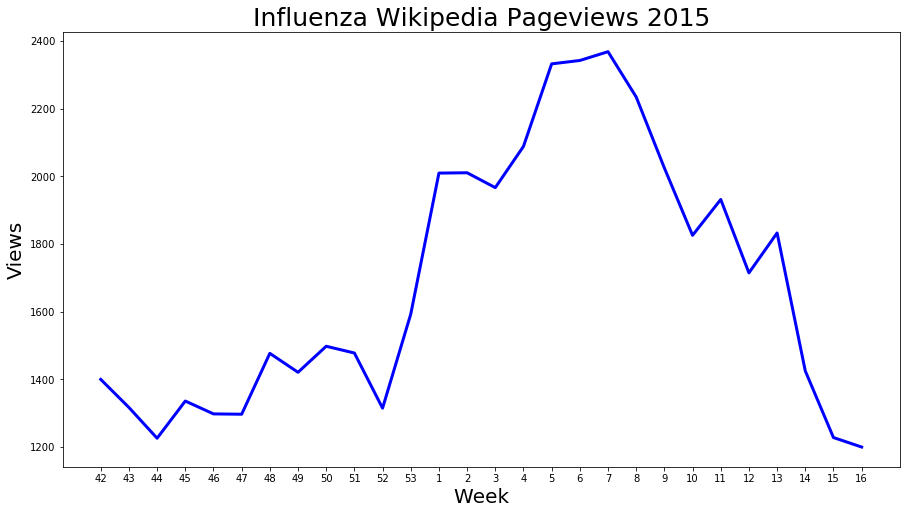

In [19]:
#Plot for 2015
plt.figure(figsize=(15,8))
plt.plot(week2015_2016,color='blue',linewidth=3)
plt.xticks(range(len(week2015_2016)), x_1)
plt.xlabel("Week",size= 20)
plt.ylabel("Views",size= 20)
plt.title("Influenza Wikipedia Pageviews 2015", size= 25)

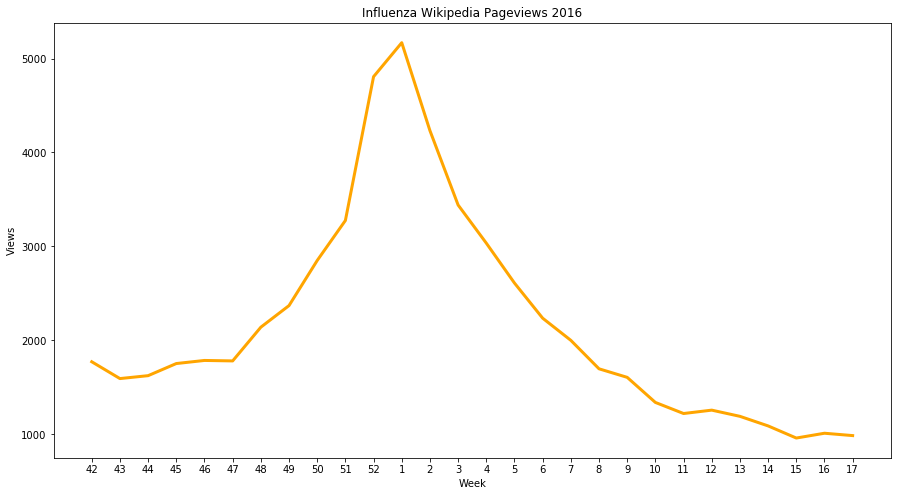

In [20]:
#Plot for 2016
plt.figure(figsize=(15,8))
plt.plot(week2016_2017,color='orange',linewidth=3)
plt.xticks(range(len(week2016_2017)), x_2)
plt.xlabel("Week")
plt.ylabel("Views")
plt.title("Influenza Wikipedia Pageviews 2016")

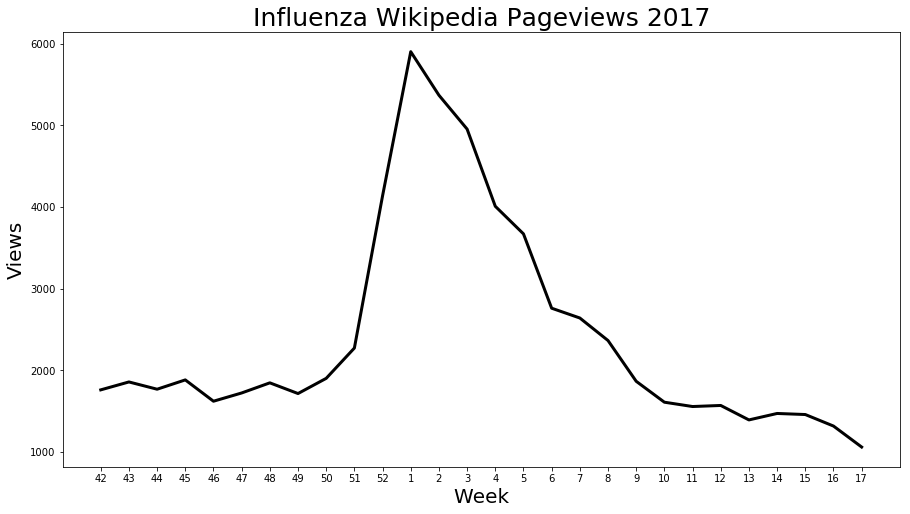

In [21]:
#Plot for 2017
plt.figure(figsize=(15,8))
plt.plot(week2017_2018,color='black',linewidth=3)
plt.xticks(range(len(week2017_2018)), x_3)

plt.xlabel("Week", size= 20)
plt.ylabel("Views", size= 20)
plt.title("Influenza Wikipedia Pageviews 2017", size= 25)

In [22]:
####1.2


In [23]:
dfI2015=pd.read_csv("tabula-InfluNet - Stagione 2015 - 2016.csv")
dfI2016=pd.read_csv("tabula-InfluNet - Stagione 2016 - 2017.csv")
dfI2017=pd.read_csv("tabula-InfluNet - Stagione 2017 - 2018.csv")

In [24]:
weekI2015_2016 = dfI2015['Incidenza'].tolist()
weekI2016_2017 = dfI2016['Incidenza'].tolist()
weekI2017_2018 = dfI2017['Incidenza'].tolist()

In [25]:
weekI2015_2016=[float(i.replace(',', '.')) for i in weekI2015_2016]
weekI2016_2017=[float(i.replace(',', '.')) for i in weekI2016_2017]
weekI2017_2018=[float(i.replace(',', '.')) for i in weekI2017_2018]

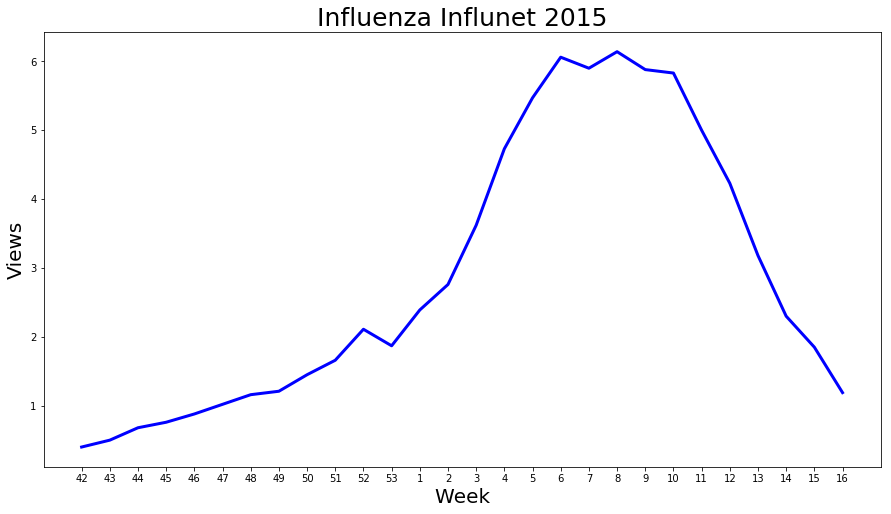

In [26]:
#Plot for 2015
plt.figure(figsize=(15,8))
plt.plot(weekI2015_2016,color='blue',linewidth=3)
plt.xticks(range(len(weekI2015_2016)), x_1)
plt.xlabel("Week", size= 20)
plt.ylabel("Views", size = 20)
plt.title("Influenza Influnet 2015", size = 25)

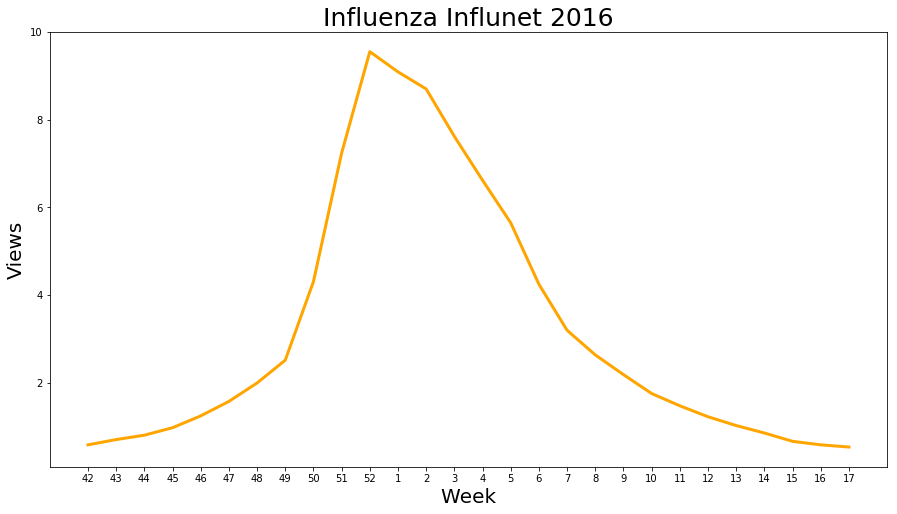

In [27]:
#Plot for 2016
plt.figure(figsize=(15,8))
plt.plot(weekI2016_2017,color='orange',linewidth=3)
plt.xticks(range(len(weekI2016_2017)), x_2)
plt.xlabel("Week", size = 20)
plt.ylabel("Views", size = 20)
plt.title("Influenza Influnet 2016", size = 25)

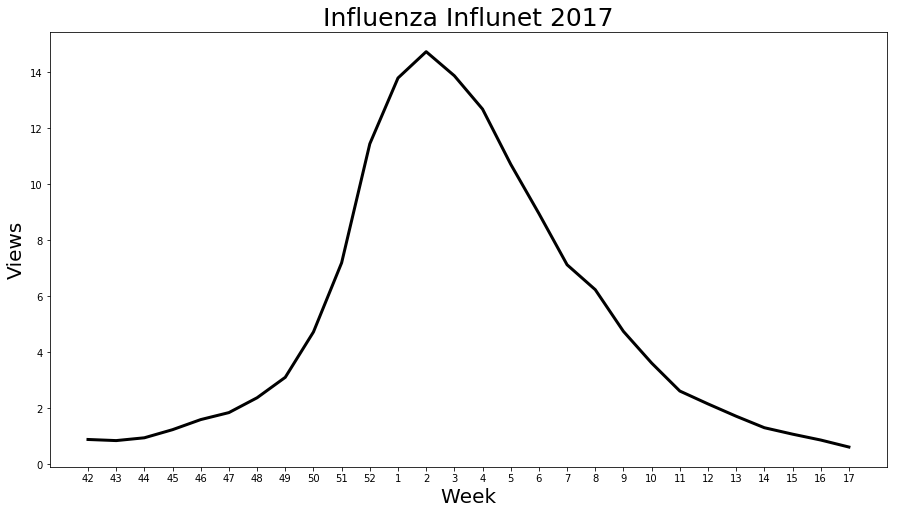

In [28]:
#Plot for 2017
plt.figure(figsize=(15,8))
plt.plot(weekI2017_2018,color='black',linewidth=3)
plt.xticks(range(len(weekI2017_2018)), x_3)

plt.xlabel("Week",size = 20)
plt.ylabel("Views", size = 20)
plt.title("Influenza Influnet 2017", size = 25)

In [29]:
#Correlation 2015-2016
corr2015_2016=pearsonr(week2015_2016,weekI2015_2016)[0]

#Correlation 2016-2017
corr2016_2017=pearsonr(week2016_2017,weekI2016_2017)[0]

#Correlation 2017-2018
corr2017_2018=pearsonr(week2017_2018,weekI2017_2018)[0]

In [30]:
print(corr2015_2016,corr2016_2017,corr2017_2018)

0.8831045834638593 0.9498488755086596 0.947740411030092


# DISCUSS FINDINGS!!!!!!!!!!!!!!!!!!! :(

In [31]:
###Part 2.1

In [32]:
df_AS2015_2016=pd.read_csv("pageviews_ALL_SYMPTOMS_2015-2016.csv")
df_AS2016_2017=pd.read_csv("pageviews_ALL_SYMPTOMS_2016-2017.csv")
df_AS2017_2018=pd.read_csv("pageviews_ALL_SYMPTOMS_2017-2018.csv")

In [33]:
df_AS2015_2016.head()

,Date,Febbre,Rinorrea,Mialgia,Cefalea,Vomito,Paracetamolo,Vaccino antinfluenzale,Artralgia,Tosse,Nausea
0,2015-10-12,517,68,187,322,274,911,81,153,168,113
1,2015-10-13,563,85,165,365,228,1000,75,87,183,157
2,2015-10-14,453,78,160,351,271,983,60,111,143,122
3,2015-10-15,525,76,152,366,199,839,77,106,149,108
4,2015-10-16,418,59,161,332,243,880,115,95,147,121


In [61]:
weekAS2015_2016=[[None]*10]*len(x_1)
#As we have the daily pageviews in the dataframe, here we sum the views for every week
for i in range(len(x_1)):
    suma=[0]*10

    for j in range(i*7,(i*7)+7):
        suma[0]=suma[0]+df_AS2015_2016['Febbre'][j]
        suma[1]=suma[1]+df_AS2015_2016['Rinorrea'][j]
        suma[2]=suma[2]+df_AS2015_2016['Mialgia'][j]
        suma[3]=suma[3]+df_AS2015_2016['Cefalea'][j]
        suma[4]=suma[4]+df_AS2015_2016['Vomito'][j]
        suma[5]=suma[5]+df_AS2015_2016['Paracetamolo'][j]
        suma[6]=suma[6]+df_AS2015_2016['Vaccino antinfluenzale'][j]
        suma[7]=suma[7]+df_AS2015_2016['Artralgia'][j]
        suma[8]=suma[8]+df_AS2015_2016['Tosse'][j]
        suma[9]=suma[9]+df_AS2015_2016['Nausea'][j]
    weekAS2015_2016[i]=suma

In [67]:
wT2015_2016=list(map(list, zip(*weekAS2015_2016)))

In [111]:
w2015_2016=[None]*11
w2015_2016[0]=weekI2015_2016
for i in range(1,11):
    w2015_2016[i]=wT2015_2016[i-1]

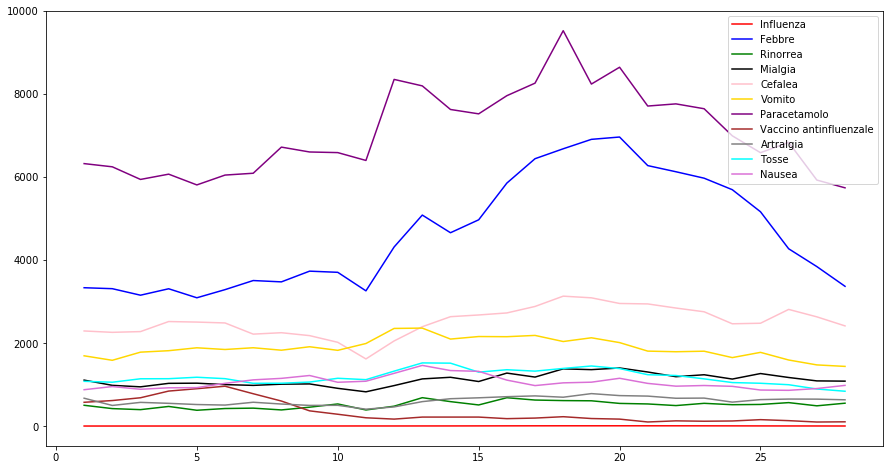

In [112]:
labels = ["Influenza","Febbre",'Rinorrea','Mialgia','Cefalea','Vomito','Paracetamolo','Vaccino antinfluenzale','Artralgia','Tosse','Nausea']
colors=["red","blue","green","black","pink","gold","purple","brown","grey","cyan","orchid","tan"]
i=0
plt.figure(figsize=(15,8))
for y in w2015_2016:
    x=range(1, len(y)+1)
    plt.plot(x,y,label=labels[i],color=colors[i])
    i=i+1
plt.legend()
plt.show()


In [114]:
#Correlation 2015-2016
corr2_2015_2016=[None]*10
for i in range(1,11):
    corr2_2015_2016[i-1]=pearsonr(weekI2015_2016,w2015_2016[i])[0]
    print(labels[i],": ",corr2_2015_2016[i-1])

Febbre :  0.9750397487006213
Rinorrea :  0.6075495811191602
Mialgia :  0.8151011662678204
Cefalea :  0.7459038755261548
Vomito :  0.3390009856338393
Paracetamolo :  0.8127396049388584
Vaccino antinfluenzale :  -0.6478731752963585
Artralgia :  0.7260254698328742
Tosse :  0.5302707299439916
Nausea :  0.0868487932450095


In [94]:
weekAS2016_2017=[[None]*10]*len(x_2)
for i in range(len(x_2)):
    suma=[0]*10
    for j in range(i*7,(i*7)+7):
        suma[0]=suma[0]+df_AS2016_2017['Febbre'][j]
        suma[1]=suma[1]+df_AS2016_2017['Rinorrea'][j]
        suma[2]=suma[2]+df_AS2016_2017['Mialgia'][j]
        suma[3]=suma[3]+df_AS2016_2017['Cefalea'][j]
        suma[4]=suma[4]+df_AS2016_2017['Vomito'][j]
        suma[5]=suma[5]+df_AS2016_2017['Paracetamolo'][j]
        suma[6]=suma[6]+df_AS2016_2017['Vaccino antinfluenzale'][j]
        suma[7]=suma[7]+df_AS2016_2017['Artralgia'][j]
        suma[8]=suma[8]+df_AS2016_2017['Tosse'][j]
        suma[9]=suma[9]+df_AS2016_2017['Nausea'][j]
    weekAS2016_2017[i]=suma

In [95]:
wT2016_2017=list(map(list, zip(*weekAS2016_2017)))

In [115]:
w2016_2017=[None]*11
w2016_2017[0]=weekI2016_2017
for i in range(1,11):
    w2016_2017[i]=wT2016_2017[i-1]

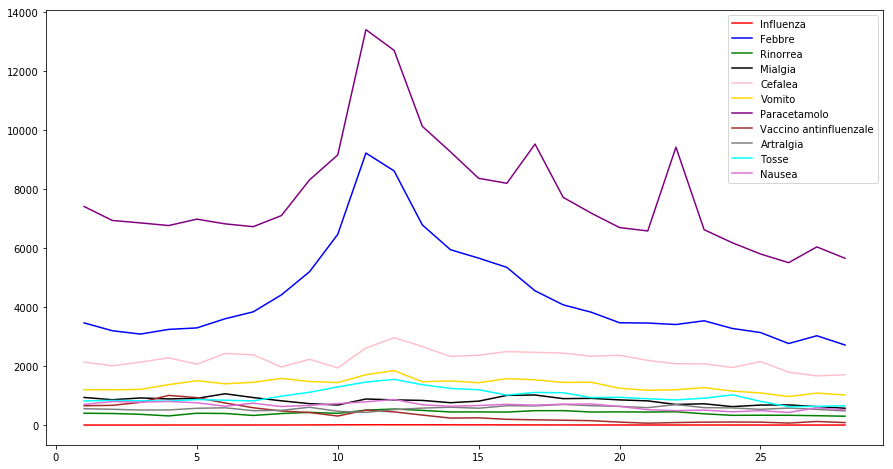

In [116]:
labels = ["Influenza","Febbre",'Rinorrea','Mialgia','Cefalea','Vomito','Paracetamolo','Vaccino antinfluenzale','Artralgia','Tosse','Nausea']
colors=["red","blue","green","black","pink","gold","purple","brown","grey","cyan","orchid","tan"]
i=0
plt.figure(figsize=(15,8))
for y in w2016_2017:
    x=range(1, len(y)+1)
    plt.plot(x,y,label=labels[i],color=colors[i])
    i=i+1
plt.legend()
plt.show()

In [117]:
#Correlation 2016-2017
corr2_2016_2017=[None]*10
for i in range(1,11):
    corr2_2016_2017[i-1]=pearsonr(weekI2016_2017,w2016_2017[i])[0]
    print(labels[i],": ",corr2_2016_2017[i-1])

Febbre :  0.9632909316772564
Rinorrea :  0.7304454146864259
Mialgia :  0.1480415617469127
Cefalea :  0.67948880495982
Vomito :  0.759006940590276
Paracetamolo :  0.8717014901237313
Vaccino antinfluenzale :  -0.05966276276252012
Artralgia :  -0.10057826366413895
Tosse :  0.9353899476288629
Nausea :  0.43786806978272935


In [99]:
weekAS2017_2018=[[None]*10]*len(x_3)
for i in range(len(x_3)):
    suma=[0]*10
    for j in range(i*7,(i*7)+7):
        suma[0]=suma[0]+df_AS2017_2018['Febbre'][j]
        suma[1]=suma[1]+df_AS2017_2018['Rinorrea'][j]
        suma[2]=suma[2]+df_AS2017_2018['Mialgia'][j]
        suma[3]=suma[3]+df_AS2017_2018['Cefalea'][j]
        suma[4]=suma[4]+df_AS2017_2018['Vomito'][j]
        suma[5]=suma[5]+df_AS2017_2018['Paracetamolo'][j]
        suma[6]=suma[6]+df_AS2017_2018['Vaccino antinfluenzale'][j]
        suma[7]=suma[7]+df_AS2017_2018['Artralgia'][j]
        suma[8]=suma[8]+df_AS2017_2018['Tosse'][j]
        suma[9]=suma[9]+df_AS2017_2018['Nausea'][j]    
    weekAS2017_2018[i]=suma

In [100]:
wT2017_2018=list(map(list, zip(*weekAS2017_2018)))

In [118]:
w2017_2018=[None]*11
w2017_2018[0]=weekI2017_2018
for i in range(1,11):
    w2017_2018[i]=wT2017_2018[i-1]

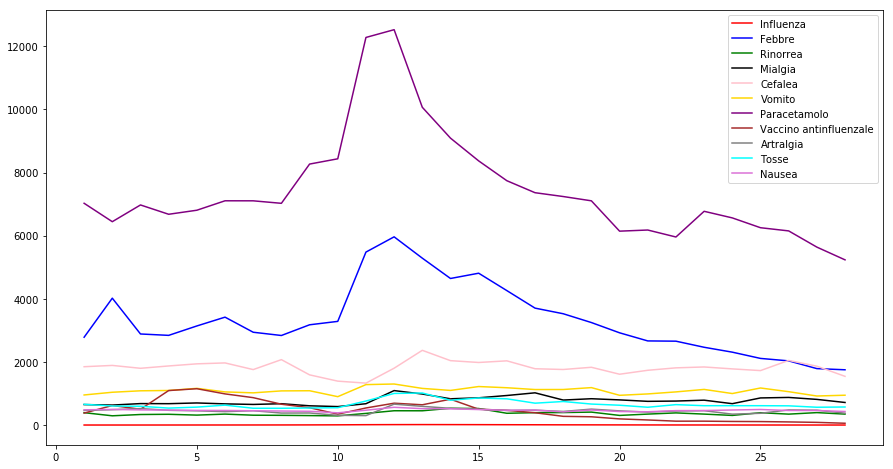

In [119]:
labels = ["Influenza","Febbre",'Rinorrea','Mialgia','Cefalea','Vomito','Paracetamolo','Vaccino antinfluenzale','Artralgia','Tosse','Nausea']
colors=["red","blue","green","black","pink","gold","purple","brown","grey","cyan","orchid","tan"]
i=0
plt.figure(figsize=(15,8))
for y in w2017_2018:
    x=range(1, len(y)+1)
    plt.plot(x,y,label=labels[i],color=colors[i])
    i=i+1
plt.legend()
plt.show()

In [120]:
#Correlation 2017-2018
corr2_2017_2018=[None]*10
for i in range(1,11):
    corr2_2017_2018[i-1]=pearsonr(weekI2017_2018,w2017_2018[i])[0]
    print(labels[i],": ",corr2_2017_2018[i-1])

Febbre :  0.8750102881974297
Rinorrea :  0.6854722685735125
Mialgia :  0.5931640009107908
Cefalea :  0.1608990193480798
Vomito :  0.5854237589445478
Paracetamolo :  0.8025088598402297
Vaccino antinfluenzale :  0.1899521287661391
Artralgia :  0.3738684673440799
Tosse :  0.8551329231780018
Nausea :  0.40659730182330245


### Febbre and Paracetamolo are the highest correlated with Influenza in every year.
### For 2015-2016 and 2016-2017 the pageviews of "Febbre" had a higher correlation with the Influnet signal than the "Influenza" pageviews

In [121]:
##3.1

In [144]:
###Select features

#Weeks
#Wikipedia pageviews counts for "Influenza" page and all the pages selected in part 2
set_feat=[None]*12
set_feat[0]='Week'
set_feat[1]='Influenza Pageviews'
Features=[None]*12
Features[0]=x_1
Features[1]=week2015_2016

for i in range(2,12):
    Features[i]=wT2015_2016[i-2]
    set_feat[i]=labels[i-1]
y=np.array(weekI2015_2016)


x_=list(map(list, zip(*Features)))

mlb = MultiLabelBinarizer()
x = pd.DataFrame(x_,columns=set_feat)


In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print( x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(22, 12) (22,)
(6, 12) (6,)


In [129]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)


In [131]:
y

array([ 0.04053512,  0.45931986,  0.58421217,  1.26978173,  1.61449886,
        1.76715568,  1.59367333,  1.29428011,  0.33654557, -0.63522654,
       -4.2903801 , -4.02006959, -3.69500842,  6.5396357 ,  7.28442965,
        7.8763639 ,  5.84402579,  1.22171343,  0.28964971, -1.63464132])

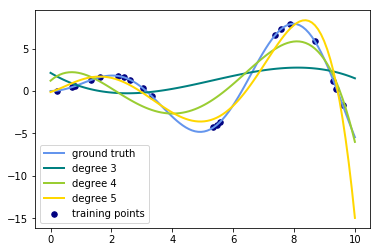

In [132]:

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [133]:
X_plot

array([[ 0.        ],
       [ 0.1010101 ],
       [ 0.2020202 ],
       [ 0.3030303 ],
       [ 0.4040404 ],
       [ 0.50505051],
       [ 0.60606061],
       [ 0.70707071],
       [ 0.80808081],
       [ 0.90909091],
       [ 1.01010101],
       [ 1.11111111],
       [ 1.21212121],
       [ 1.31313131],
       [ 1.41414141],
       [ 1.51515152],
       [ 1.61616162],
       [ 1.71717172],
       [ 1.81818182],
       [ 1.91919192],
       [ 2.02020202],
       [ 2.12121212],
       [ 2.22222222],
       [ 2.32323232],
       [ 2.42424242],
       [ 2.52525253],
       [ 2.62626263],
       [ 2.72727273],
       [ 2.82828283],
       [ 2.92929293],
       [ 3.03030303],
       [ 3.13131313],
       [ 3.23232323],
       [ 3.33333333],
       [ 3.43434343],
       [ 3.53535354],
       [ 3.63636364],
       [ 3.73737374],
       [ 3.83838384],
       [ 3.93939394],
       [ 4.04040404],
       [ 4.14141414],
       [ 4.24242424],
       [ 4.34343434],
       [ 4.44444444],
       [ 4